In [6]:
import nltk
nltk.download('punkt')

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory 
tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold (which is also caused by other viruses,
predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. In cows and pigs they cause diarrhea, while in mice they cause 
hepatitis and encephalomyelitis. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.

Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales, and realm Riboviria.They are enveloped viruses 
with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry. The genome size of coronaviruses ranges from approximately 26 to 32 
kilobases, one of the largest among RNA viruses. They have characteristic club-shaped spikes that project from their surface, which in electron micrographs 
create an image reminiscent of the solar corona, from which their name derives.

Coronaviruses were first discovered in the 1930s when an acute respiratory infection of domesticated chickens was shown to be caused by infectious bronchitis
virus (IBV). Arthur Schalk and M.C. Hawn described in 1931 a new respiratory infection of chickens in North Dakota. The infection of new-born chicks was 
characterized by gasping and listlessness. The chicks' mortality rate was 40–90%.Fred Beaudette and Charles Hudson six years later successfully isolated
and cultivated the infectious bronchitis virus which caused the disease.In the 1940s, two more animal coronaviruses, mouse hepatitis virus (MHV) and 
transmissible gastroenteritis virus (TGEV), were isolated.It was not realized at the time that these three different viruses were related.

Human coronaviruses were discovered in the 1960s.They were isolated using two different methods in the United Kingdom and the United States. E.C. Kendall, 
Malcom Byone, and David Tyrrell working at the Common Cold Unit of the British Medical Research Council in 1960 isolated from a boy a novel common cold virus
B814.The virus was not able to be cultivated using standard techniques which had successfully cultivated rhinoviruses, adenoviruses and other known common cold
viruses. In 1965, Tyrrell and Byone successfully cultivated the novel virus by serially passing it through organ culture of human embryonic trachea.The new
cultivating method was introduced to the lab by Bertil Hoorn.The isolated virus when intranasally inoculated into volunteers caused a cold and was inactivated
by ether which indicated it had a lipid envelope.Around the same time, Dorothy Hamre and John Procknow at the University of Chicago isolated a novel cold virus
229E from medical students, which they grew in kidney tissue culture. The novel virus 229E, like the virus strain B814, when inoculated into volunteers caused
a cold and was inactivated by ether.

The two novel strains B814 and 229E were subsequently imaged by electron microscopy in 1967 by Scottish virologist June Almeida at St. Thomas Hospital in 
London.Almeida through electron microscopy was able to show that B814 and 229E were morphologically related by their distinctive club-like spikes. Not only 
were they related with each other, but they were morphologically related to infectious bronchitis virus (IBV). A research group at the National Institute of 
Health the same year was able to isolate another member of this new group of viruses using organ culture and named the virus strain OC43 (OC for organ culture),
Like B814, 229E, and IBV, the novel cold virus OC43 had distinctive club-like spikes when observed with the electron microscope.

The IBV-like novel cold viruses were soon shown to be also morphologically related to the mouse hepatitis virus.This new group of IBV-like viruses came to 
be known as coronaviruses after their distinctive morphological appearance. Human coronavirus 229E and human coronavirus OC43 continued to be studied in 
subsequent decades. The coronavirus strain B814 was lost. It is not known which present human coronavirus it was.Other human coronaviruses have since been
identified, including SARS-CoV in 2003, HCoV NL63 in 2004, HCoV HKU1 in 2005, MERS-CoV in 2012, and SARS-CoV-2 in 2019. There have also been a large number
of animal coronaviruses identified since the 1960s."""

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Preprocessing the data 
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [8]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['coronaviruses are a group of related rna viruses that cause diseases in mammals and birds.',
 'in humans and birds, they cause respiratory tract infections that can range from mild to lethal.',
 'mild illnesses in humans include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause sars, mers, and covid- .',
 'in cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis.',
 'there are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.',
 'coronaviruses constitute the subfamily orthocoronavirinae, in the family coronaviridae, order nidovirales, and realm riboviria.they are enveloped viruses with a positive-sense single-stranded rna genome and a nucleocapsid of helical symmetry.',
 'the genome size of coronaviruses ranges from approximately to kilobases, one of the largest among rna viruses.',
 'they have characteristic club-shaped sp

In [9]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [10]:
sent_word

[['coronaviruses',
  'are',
  'a',
  'group',
  'of',
  'related',
  'rna',
  'viruses',
  'that',
  'cause',
  'diseases',
  'in',
  'mammals',
  'and',
  'birds',
  '.'],
 ['in',
  'humans',
  'and',
  'birds',
  ',',
  'they',
  'cause',
  'respiratory',
  'tract',
  'infections',
  'that',
  'can',
  'range',
  'from',
  'mild',
  'to',
  'lethal',
  '.'],
 ['mild',
  'illnesses',
  'in',
  'humans',
  'include',
  'some',
  'cases',
  'of',
  'the',
  'common',
  'cold',
  '(',
  'which',
  'is',
  'also',
  'caused',
  'by',
  'other',
  'viruses',
  ',',
  'predominantly',
  'rhinoviruses',
  ')',
  ',',
  'while',
  'more',
  'lethal',
  'varieties',
  'can',
  'cause',
  'sars',
  ',',
  'mers',
  ',',
  'and',
  'covid-',
  '.'],
 ['in',
  'cows',
  'and',
  'pigs',
  'they',
  'cause',
  'diarrhea',
  ',',
  'while',
  'in',
  'mice',
  'they',
  'cause',
  'hepatitis',
  'and',
  'encephalomyelitis',
  '.'],
 ['there',
  'are',
  'as',
  'yet',
  'no',
  'vaccines',
  'or',

In [12]:
nltk.download('stopwords')
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
sent_word

[['coronaviruses',
  'group',
  'related',
  'rna',
  'viruses',
  'cause',
  'diseases',
  'mammals',
  'birds',
  '.'],
 ['humans',
  'birds',
  ',',
  'cause',
  'respiratory',
  'tract',
  'infections',
  'range',
  'mild',
  'lethal',
  '.'],
 ['mild',
  'illnesses',
  'humans',
  'include',
  'cases',
  'common',
  'cold',
  '(',
  'also',
  'caused',
  'viruses',
  ',',
  'predominantly',
  'rhinoviruses',
  ')',
  ',',
  'lethal',
  'varieties',
  'cause',
  'sars',
  ',',
  'mers',
  ',',
  'covid-',
  '.'],
 ['cows',
  'pigs',
  'cause',
  'diarrhea',
  ',',
  'mice',
  'cause',
  'hepatitis',
  'encephalomyelitis',
  '.'],
 ['yet',
  'vaccines',
  'antiviral',
  'drugs',
  'prevent',
  'treat',
  'human',
  'coronavirus',
  'infections',
  '.'],
 ['coronaviruses',
  'constitute',
  'subfamily',
  'orthocoronavirinae',
  ',',
  'family',
  'coronaviridae',
  ',',
  'order',
  'nidovirales',
  ',',
  'realm',
  'riboviria.they',
  'enveloped',
  'viruses',
  'positive-sense',


In [14]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [15]:
# Test the word vectors
vector = model.wv['group']

print(vector)

[-3.51985660e-03 -4.50727856e-03  5.19222813e-04 -3.84814036e-03
  2.38419583e-04  3.50076123e-03  3.87981371e-03  2.97262380e-03
  3.34277080e-04  3.27700027e-03 -1.55394300e-04  1.02890015e-03
  1.41285418e-03  1.67492323e-03  3.54675623e-03  2.09823786e-03
 -4.65877913e-03 -3.39707003e-05  2.00398988e-03  2.54011742e-04
 -1.40530197e-03 -1.40043302e-03 -1.07647607e-03  1.67425093e-03
  2.04092078e-03  5.84634952e-04 -3.48946429e-03  2.62657716e-03
 -1.64873770e-03 -1.30913325e-03 -1.23215292e-03  3.73615767e-03
  2.77752499e-03  4.28159488e-03 -1.02588907e-03  2.10266071e-03
 -3.26631754e-03  4.44579218e-03 -6.97035517e-04  1.32912130e-03
  3.07549653e-03 -1.21532954e-04 -1.17717148e-03 -1.69272011e-03
 -3.46409692e-03  1.98615529e-03 -3.51170823e-03 -3.17001645e-03
  3.57078691e-03  3.22242593e-03  3.36591154e-03 -1.96451251e-03
  3.71874450e-03  4.49484040e-04  2.52217217e-03  4.01266851e-03
 -3.74467811e-03  2.99833808e-03 -1.68656791e-03 -1.16850878e-03
 -8.70238524e-04 -4.74924

In [16]:
# Most similar words
similar = model.wv.most_similar('corona',topn=20)

similar

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('time', 0.28712013363838196),
 ('national', 0.25627994537353516),
 ('caused', 0.25317704677581787),
 (',', 0.251863956451416),
 ('family', 0.24540448188781738),
 ('virologist', 0.22210761904716492),
 ('procknow', 0.21994268894195557),
 ('observed', 0.20585058629512787),
 ('lab', 0.20341110229492188),
 ('malcom', 0.19668446481227875),
 ('gasping', 0.19565384089946747),
 ('grew', 0.1900625228881836),
 ('lost', 0.17888522148132324),
 ('nl', 0.17845585942268372),
 ('.', 0.1776943951845169),
 ('mammals', 0.17241699993610382),
 ('new', 0.16773644089698792),
 ('inactivated', 0.16277971863746643),
 ('hcov', 0.16275809705257416),
 ('three', 0.16072773933410645)]

In [17]:
# You can also check words similarity and compare above
model.wv.similarity(w1='corona',w2='coronavirus')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.010245751

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


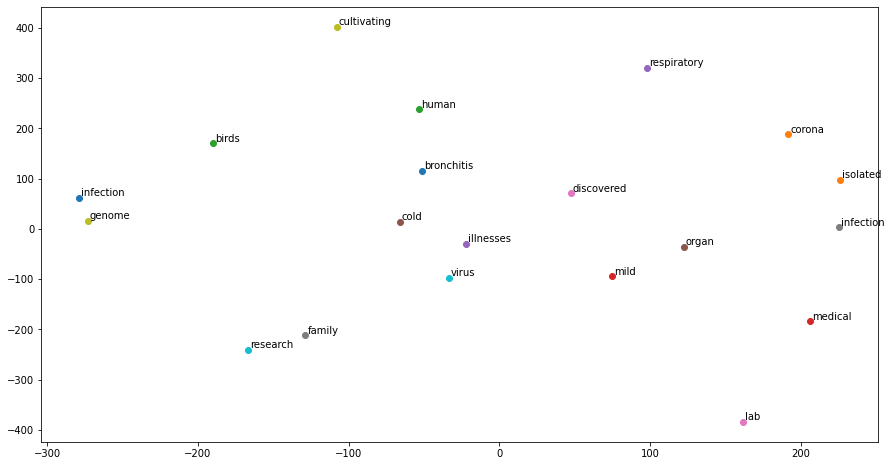

In [27]:
from sklearn.manifold import  TSNE
vocab = ['bronchitis','corona','human','medical','respiratory','organ','lab','family','cultivating','virus','infection','isolated','birds','mild',
         'illnesses','cold','discovered','infection','genome','research']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)